<a href="https://colab.research.google.com/github/battuvenky/STML-ASSGENMENTS-2025/blob/main/STML_Assg_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Model Accuracies:
SVM: 0.77
KNN: 0.77
Logistic Regression: 0.77


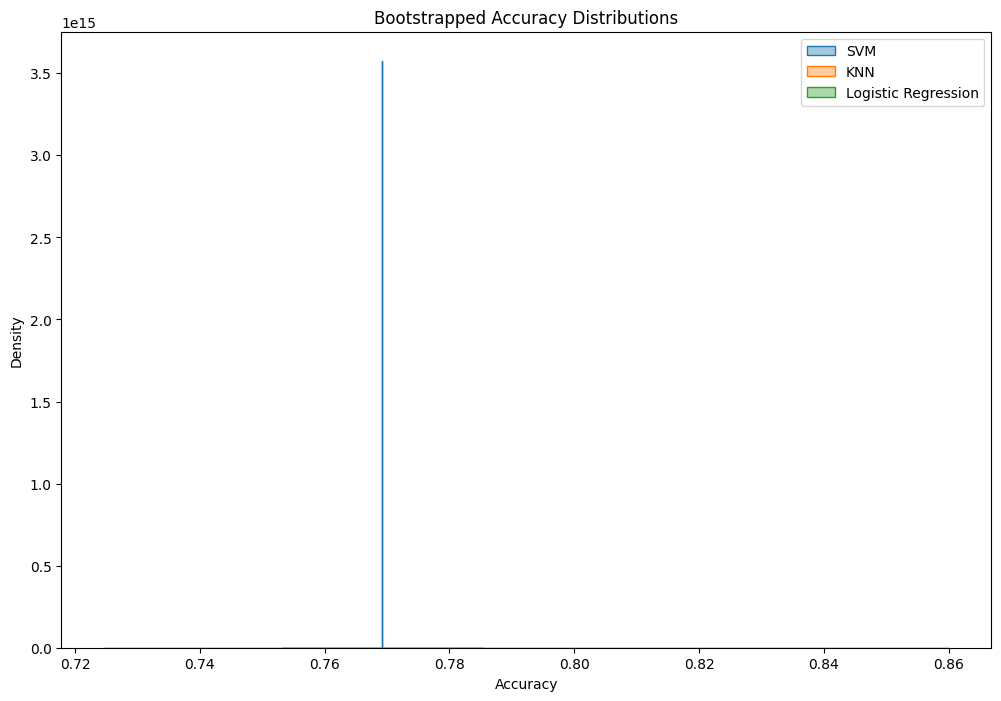

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Read the data
data = pd.read_csv("/content/archive (11).zip")

# Step 2: Data preprocessing
# Dropping unnecessary columns
data_cleaned = data.drop(columns=["Date_of_Surgery", "Date_of_Last_Visit"])

# Handling missing target values by dropping rows with missing Patient_Status
data_cleaned = data_cleaned.dropna(subset=["Patient_Status"])

# Encoding the target variable
label_encoder = LabelEncoder()
data_cleaned["Patient_Status"] = label_encoder.fit_transform(data_cleaned["Patient_Status"])


# Handling categorical variables with one-hot encoding
data_encoded = pd.get_dummies(
    data_cleaned,
    columns=["Gender", "Tumour_Stage", "Histology", "ER status", "PR status", "HER2 status", "Surgery_type"],
    drop_first=True
)

# Separating features and target variable
X = data_encoded.drop(columns=["Patient_Status"])
y = data_encoded["Patient_Status"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 3: Train SVM, KNN, Logistic Regression models and calculate accuracies
models = {
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

# Dictionary to store accuracies
accuracies = {}

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)
# Display accuracies
print("Model Accuracies:")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.2f}")

    # Step 4: Bootstrapping for accuracy
    def bootstrap_accuracy(model, X, y, n_iterations=1000, test_size=0.2):
        scores = []
        for _ in range(n_iterations):
              X_boot, _, y_boot, _ = train_test_split(X, y, test_size=test_size, random_state=None)
              model.fit(X_boot, y_boot)
              y_pred = model.predict(X_test)
              scores.append(accuracy_score(y_test, y_pred))
        return scores
                    # Generate a bootstrap sample

# Generate bootstrap accuracy distributions
bootstrap_results = {}
for name, model in models.items():
    bootstrap_results[name] = bootstrap_accuracy(model, X, y)

    # Step 5: Plot bootstrapping results
plt.figure(figsize=(12, 8))
for name, scores in bootstrap_results.items():
  sns.kdeplot(scores, label=name, fill=True, alpha=0.4)



plt.title("Bootstrapped Accuracy Distributions")
plt.xlabel("Accuracy")
plt.ylabel("Density")
plt.legend()
plt.show()



